There are several things I'd like to know about the data:
1. Distribution of emotions of training examples
2. 

In [24]:
# Import relevant libraries

import os
import numpy as np
import pandas as pd
import cv2
from emotion_detection_utils import *

In [25]:
# Define dataset directory and initialise images and labels array

data_dir = 'emotion_dataset/train'
all_images = []
all_labels = []

# load folders and append images and labels using pre-defined function 
for emotion in os.listdir(data_dir):
    emotion_folder = os.path.join(data_dir, emotion)
    images, labels = load_images_and_labels(emotion_folder, emotion)
    all_images.append(images)
    all_labels.append(labels)

In [29]:
# concatenate all images and labels at once

X_train_images = np.concatenate(all_images, axis=0).astype(np.float32) / 255
X_train_labels = np.concatenate(all_labels, axis=0)

In [ ]:
# Set up dict and inverse dict for swapping between emotions and labels 

emotiontolabel = {
    'happy': 0,
    'sad': 1,
    'angry': 2,
    'surprised': 3,
    'neutral': 4,
    'fearful': 5,
    'disgusted': 6
}

labeltoemotion = {label:emotion for emotion, label in emotiontolabel.items()}

# Convert text labels to their corresponding number
X_train_labels = np.array([emotiontolabel[label] for label in X_train_labels])

In [31]:
display(X_train_images.shape)
display(X_train_labels.shape)

(28709, 48, 48, 3)

(28709,)

We start by taking a quick look at the images we are working with. 

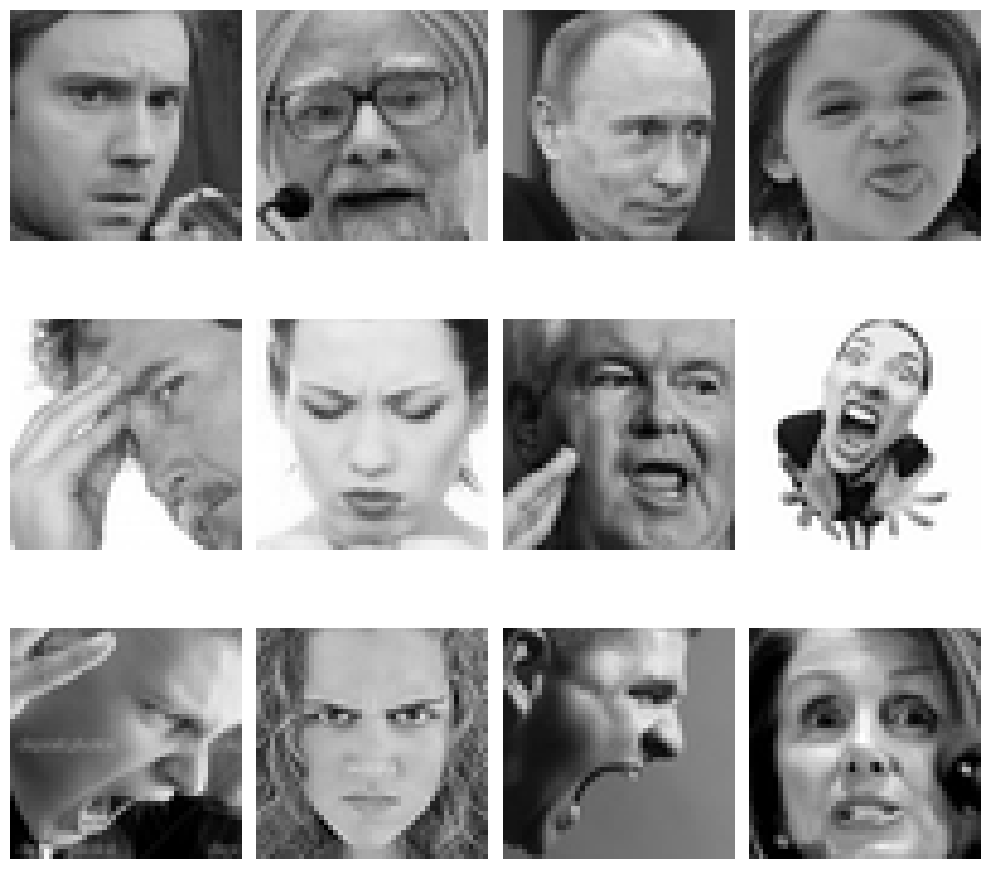

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize = (10, 10))

for i in range(3):
    for j in range(4):
        index = i * 4+j
        if index < len(images):
            ax[i, j].imshow(X_train_images[index])
            ax[i, j].axis('off')
        else:
            ax[i, j].axis('off')

plt.tight_layout()
plt.show()

Quickly we seem to be able to make some assumptions and observations about the dataset. First of all, all the images seem to only include a single face, which is good for training as the model can focus on learning the details of the face. Secondly, the resolution of the images are quite low, which might be difficult for the model. Regardless, we will see what we can do. 

In [ ]:
# Return the number of unique labels and the counts for each of them

unique_labels, counts = np.unique(X_train_labels, return_counts = True)
unique_emotions = [labeltoemotion[label] for label in unique_labels]

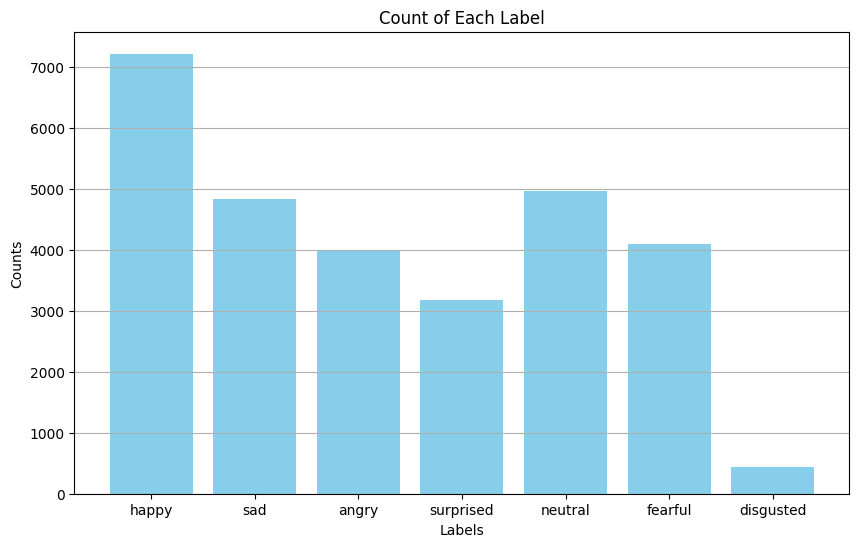

In [33]:
# Plot the amount of labels for each emotion

plt.figure(figsize=(10, 6))
plt.bar(unique_emotions, counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Count of Each Label')
plt.xticks(unique_labels)
plt.grid(axis='y')
plt.show()

Quickly we notice that we have a lot more images of happy faces compared to disgusted faces, which is to be expected. The number of images for other emotions don't seem to vary a lot. Overall it seems that we have a pretty decent spread of data to use for training. Let's move on to training the model. 